In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [235]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [236]:
from google.colab import files

# Simpan dulu ke file CSV
df.to_csv("titanic_dataset.csv", index=False)

# Download ke laptop
files.download("titanic_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [238]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [239]:
df.fillna({"Age": df["Age"].median()}, inplace=True)

In [240]:
df.fillna({"Embarked": df["Embarked"].mode()[0]}, inplace=True)

In [241]:
df.drop(columns=["Cabin"], inplace=True)

In [242]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [243]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [244]:
if df["Fare"].isnull().sum() > 0:
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [245]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [246]:
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

In [247]:
df["Title"] = df["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [248]:
df["Title"] = df["Title"].replace(
    ["Mlle","Ms"], "Miss"
).replace(
    ["Mme"], "Mrs"
).replace(
    ["Lady","Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"], "Rare"
)


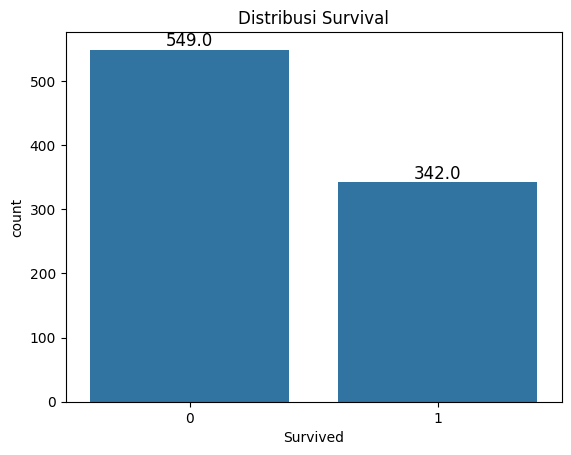

In [249]:
# Distribusi survival dengan anotasi angka
ax = sns.countplot(x="Survived", data=df)
plt.title("Distribusi Survival")

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),  # nilai count
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posisi
        ha='center', va='bottom', fontsize=12, color='black'
    )

plt.show()

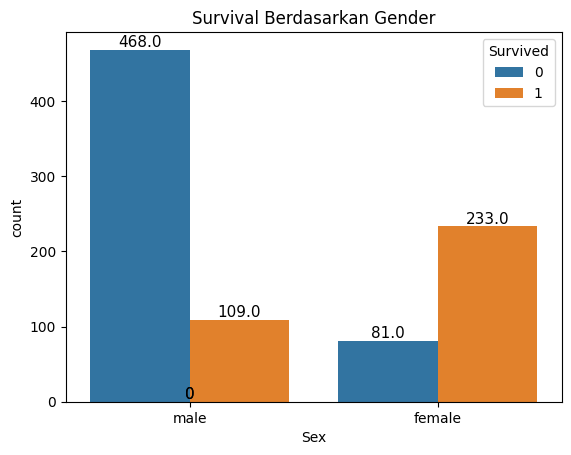

In [250]:
ax = sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Berdasarkan Gender")

# Tambahkan angka di atas tiap batang
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),                        # nilai count
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posisi teks
        ha='center', va='bottom', fontsize=11, color='black', rotation=0
    )

plt.show()


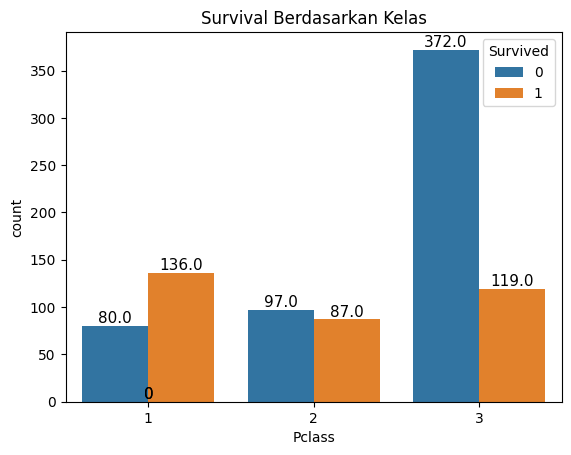

In [251]:
ax = sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival Berdasarkan Kelas")

# Tambahkan angka di atas tiap batang
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=11, color='black'
    )

plt.show()

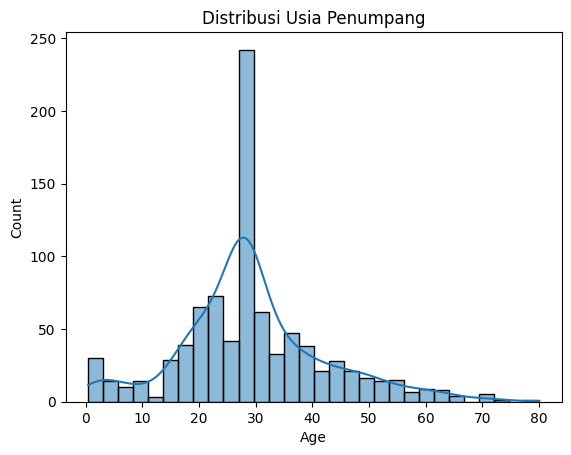

In [252]:
# Distribusi umur
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribusi Usia Penumpang")
plt.show()

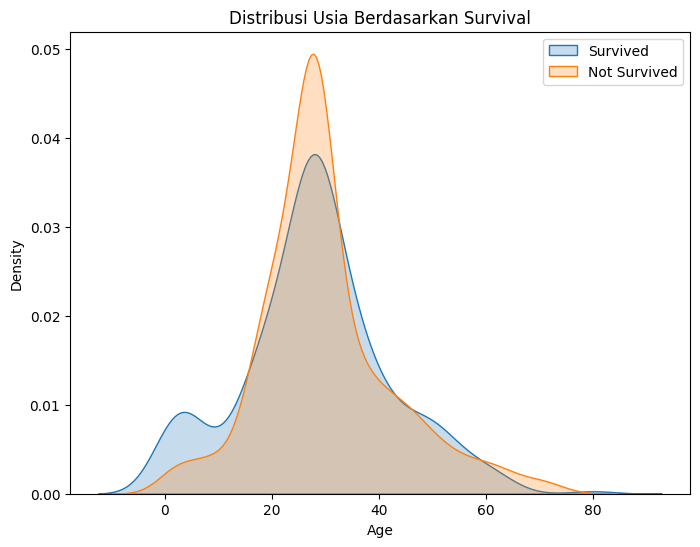

In [253]:
# Survival berdasarkan usia
plt.figure(figsize=(8,6))
sns.kdeplot(df[df["Survived"]==1]["Age"], fill=True, label="Survived")
sns.kdeplot(df[df["Survived"]==0]["Age"], fill=True, label="Not Survived")
plt.title("Distribusi Usia Berdasarkan Survival")
plt.legend()
plt.show()


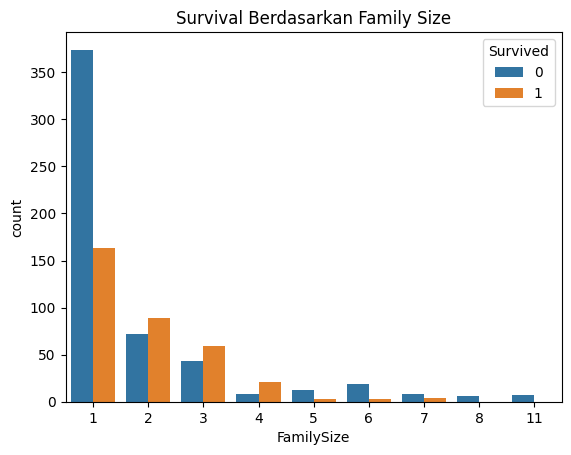

In [254]:
# Survival berdasarkan FamilySize
sns.countplot(x="FamilySize", hue="Survived", data=df)
plt.title("Survival Berdasarkan Family Size")
plt.show()


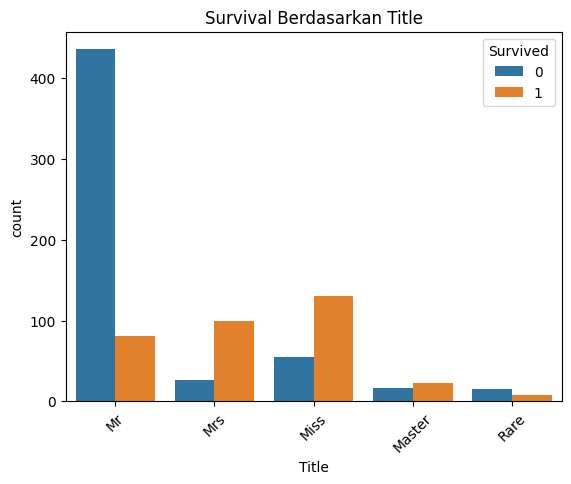

In [255]:
# Survival berdasarkan Title
sns.countplot(x="Title", hue="Survived", data=df)
plt.title("Survival Berdasarkan Title")
plt.xticks(rotation=45)
plt.show()


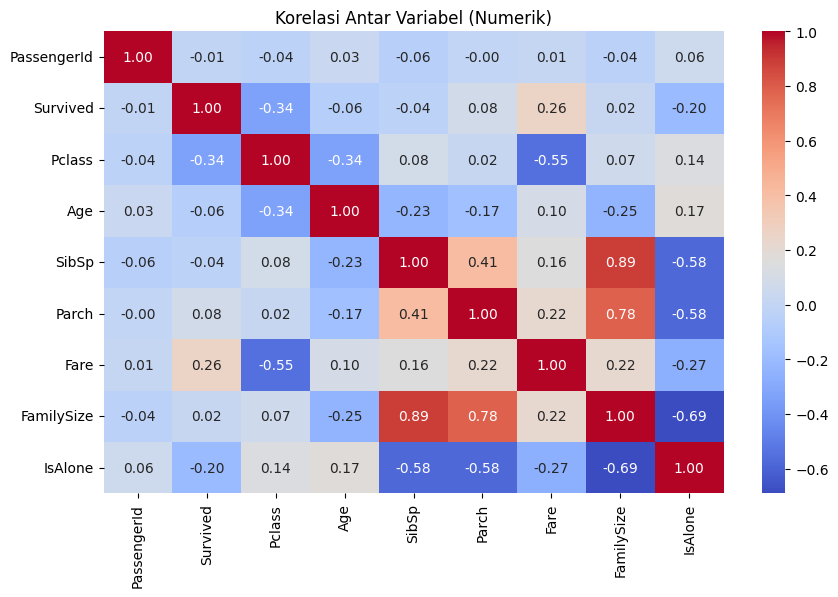

In [256]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel (Numerik)")
plt.show()


In [257]:
# === 3. Encode Categorical Data ===
# Sex → binary encode
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Embarked & Title → one-hot encoding
df = pd.get_dummies(df, columns=["Embarked", "Title"], drop_first=True)

# === 4. Drop Kolom Tidak Relevan ===
df = df.drop(columns=["PassengerId", "Ticket", "Name"])

# === 5. Normalisasi (opsional, tergantung model) ===
scaler = StandardScaler()
df[["Age", "Fare", "FamilySize"]] = scaler.fit_transform(df[["Age", "Fare", "FamilySize"]])

# === Cek hasil akhir ===
print(df.head())
print(df.info())

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  FamilySize  \
0         0       3    0 -0.565736      1      0 -0.502445    0.059160   
1         1       1    1  0.663861      1      0  0.786845    0.059160   
2         1       3    1 -0.258337      0      0 -0.488854   -0.560975   
3         1       1    1  0.433312      1      0  0.420730    0.059160   
4         0       3    0  0.433312      0      0 -0.486337   -0.560975   

   IsAlone  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
0        0       False        True       False      True      False   
1        0       False       False       False     False       True   
2        1       False        True        True     False      False   
3        0       False        True       False     False       True   
4        1       False        True       False      True      False   

   Title_Rare  
0       False  
1       False  
2       False  
3       False  
4       False  
<class 'pandas.core.frame.DataFr

In [258]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,-0.565736,1,0,-0.502445,0.059160,0,False,True,False,True,False,False
1,1,1,1,0.663861,1,0,0.786845,0.059160,0,False,False,False,False,True,False
2,1,3,1,-0.258337,0,0,-0.488854,-0.560975,1,False,True,True,False,False,False
3,1,1,1,0.433312,1,0,0.420730,0.059160,0,False,True,False,False,True,False
4,0,3,0,0.433312,0,0,-0.486337,-0.560975,1,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.181487,0,0,-0.386671,-0.560975,1,False,True,False,False,False,True
887,1,1,1,-0.796286,0,0,-0.044381,-0.560975,1,False,True,True,False,False,False
888,0,3,1,-0.104637,1,2,-0.176263,1.299429,0,False,True,True,False,False,False
889,1,1,0,-0.258337,0,0,-0.044381,-0.560975,1,False,False,False,True,False,False


In [259]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [260]:
# === 7. Split Data ===
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [261]:

# Simpan dulu ke file CSV
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

# Download ke laptop
files.download("train.csv")
files.download("test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.821229   0.803279  0.710145  0.753846
1        Random Forest  0.837989   0.812500  0.753623  0.781955
2                  SVM  0.832402   0.809524  0.739130  0.772727


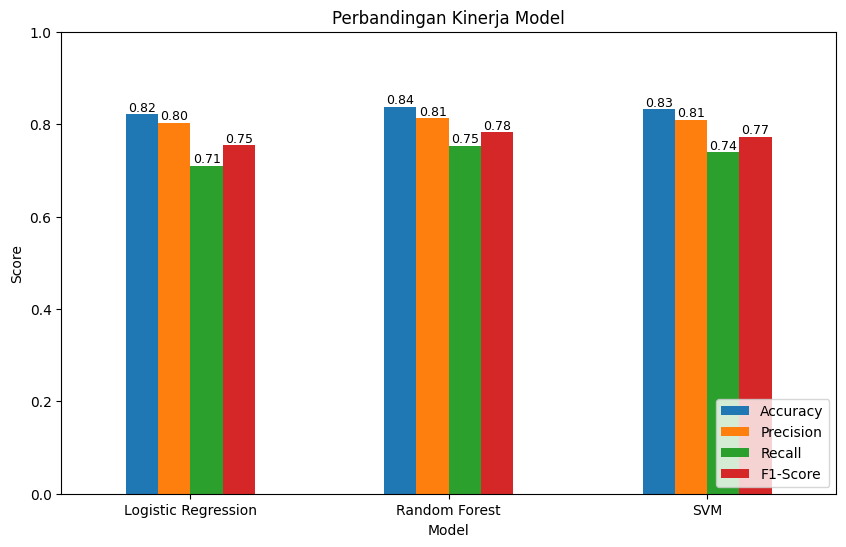

In [263]:
# === 8. Training & Evaluation ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

# === Buat DataFrame Perbandingan ===
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df)

# === Visualisasi Perbandingan dengan Angka ===
ax = results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind="bar", figsize=(10,6), rot=0
)
plt.title("Perbandingan Kinerja Model")
plt.ylabel("Score")
plt.ylim(0,1)

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",              # format angka 2 desimal
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", va="bottom", fontsize=9, color="black", rotation=0
    )

plt.legend(loc="lower right")
plt.show()

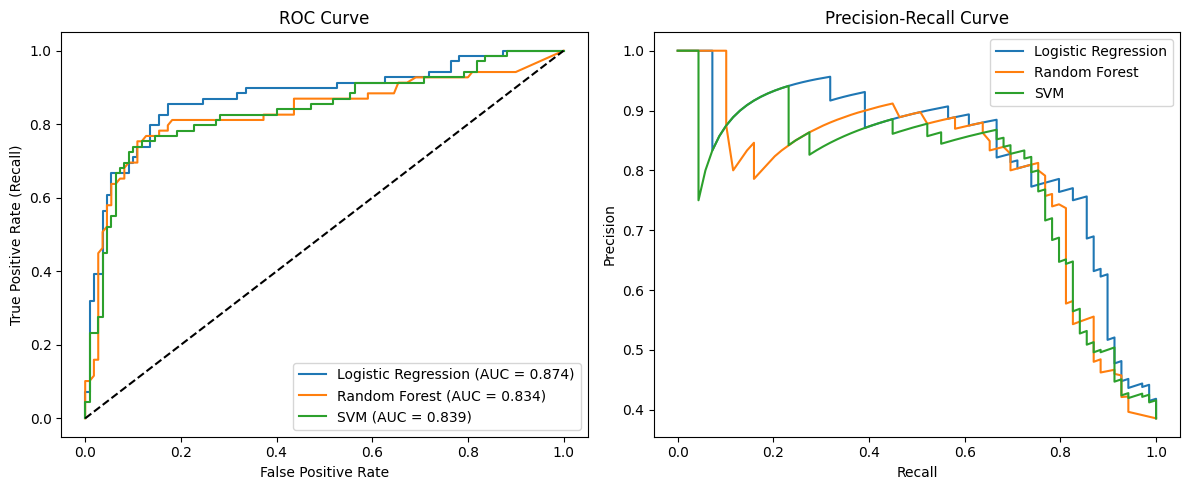

In [180]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# === ROC Curve ===
plt.figure(figsize=(12,5))

# Subplot 1: ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], 'k--')  # garis random
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()

# Subplot 2: Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, label=name)

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()

In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# === Evaluasi Model dengan AUC ===
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    results.append([name, acc, prec, rec, f1, auc])

# Buat DataFrame hasil evaluasi
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.821229   0.803279  0.710145  0.753846  0.874045
1        Random Forest  0.837989   0.812500  0.753623  0.781955  0.834256
2                  SVM  0.832402   0.809524  0.739130  0.772727  0.839394


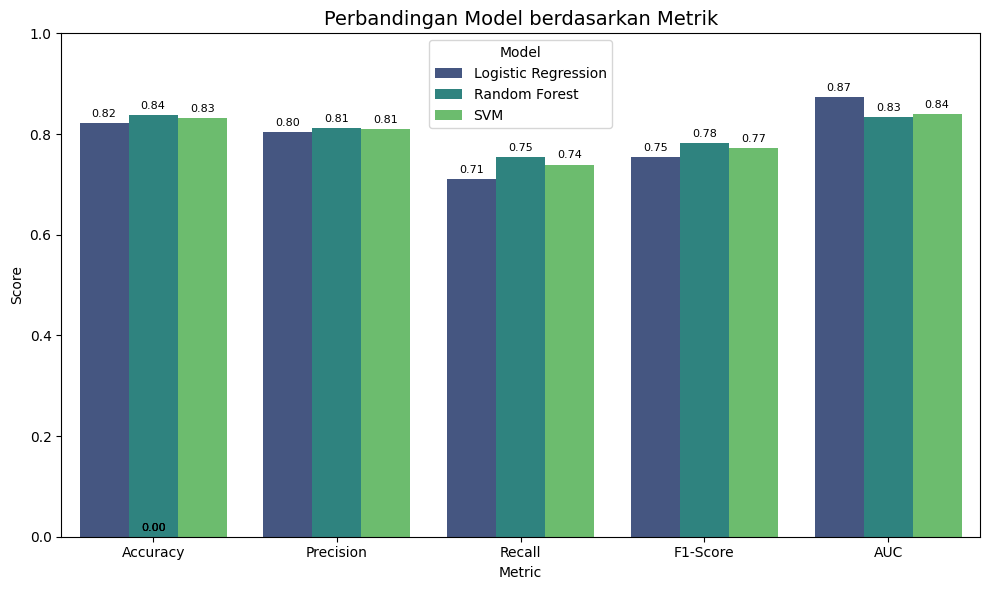

In [183]:
# === 1. Ubah DataFrame ke format long ===
results_long = results_df.melt(
    id_vars="Model",
    value_vars=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"],
    var_name="Metric",
    value_name="Score"
)

# === 2. Plot grouped bar chart ===
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_long,
    x="Metric", y="Score", hue="Model",
    palette="viridis"
)

# Tambahkan angka di atas bar
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=8, xytext=(0, 3),
        textcoords='offset points'
    )

plt.ylim(0, 1)
plt.title("Perbandingan Model berdasarkan Metrik", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

**Insight**

1. Random Forest menunjukkan performa terbaik secara keseluruhan (Accuracy, Recall, F1-Score). Model ini lebih handal dalam mendeteksi penumpang yang benar-benar selamat.

2. Logistic Regression unggul pada AUC (0.87), artinya paling baik dalam membedakan survivor vs non-survivor dari segi probabilitas. Cocok untuk analisis berbasis probabilistik.

3. SVM stabil dan kompetitif, namun tidak ada metrik yang benar-benar unggul dibanding dua model lainnya.

**Insight Menarik**

Tidak ada model yang “sempurna” → pilihan model tergantung pada tujuan analisis:

1. Jika tujuan utama adalah prediksi siapa yang selamat dengan akurat, gunakan Random Forest.

2. Jika tujuan adalah estimasi risiko/probabilitas bertahan hidup, gunakan Logistic Regression.

**Kesimpulan**

Random Forest layak dipilih sebagai baseline production model, sementara Logistic Regression bisa dipakai untuk interpretasi dan insight yang lebih mudah dijelaskan ke stakeholder.